# 1. Configuración del Entorno y Carga de Datos:

* Se importan las bibliotecas necesarias.
* Se carga el archivo de Excel desde el PC y se lee en un DataFrame de pandas.


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd                                     # Para trabajar con dataframe
import numpy as np                                      # Para realizar operaciones numericas en grandes conjuntos de datos (media,sd)
import matplotlib.pyplot as plt                         # Para visualizar graficos
from sklearn.model_selection import train_test_split    # sklearn: Para algoritmos de clasificación y regresión // train_test_split: Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler, MinMaxScaler          # sklearn: Para algoritmos de clasificación y regresión // StandardScaler: Para escalar
from tensorflow.keras.models import Sequential          # Tensorflow: Biblioteca de Google // Keras: API para mod de RN en Tensorflow // Sequential: Crea modelos secuenciales de RN
from tensorflow.keras.layers import Dense               # Tensorflow: Biblioteca de Google // Keras: API para mod de RN en Tensorflow // Dense: Define capas totalmente conectadas en la red neuronal
from google.colab import files                          # files: Es un módulo en Colab que permite cargar y descargar archivos desde y hacia el entorno de Colab.

In [2]:
# Cargar el archivo desde el PC
uploaded = files.upload()

Saving MGC hoy.xlsx to MGC hoy.xlsx


In [3]:
# Leer el archivo de Excel
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

In [4]:
data.shape

(2790, 16)

In [440]:
# Mostrar las primeras filas del conjunto de datos
data.head()

,key,SECTOR,ZONAL,MES,TAMAÑO,VENTAS,CONTRICAT,CONTAB,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_OBR,PORC_TSB,PROM_SLO,PROM_SLE,RESULTADO
0,RUC-681,INTERMEDIACIÓN FINANCIERA,Norte,6,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,523,132.221766,0.02,NaN,0.00,NaN,4117.37,CON INFRACCIÓN
1,RUC-2751,CONSTRUCCIÓN,Oeste,6,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,1,36.120465,0.08,NaN,0.00,NaN,5751.81,CON INFRACCIÓN
2,RUC-2751,CONSTRUCCIÓN,Oeste,10,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,1,36.503765,0.08,NaN,0.00,NaN,5751.81,SIN INFRACCIÓN
3,RUC-4325,ENSEÑANZA,Oeste,11,MICROEMPRESA,DE 1 A 25 UIT,Organizaciones Sociales y Comunitarias,MANUAL/COMPUTARIZADO,4,56.602327,0.09,0.1,0.11,1096.65,3807.05,SIN INFRACCIÓN
4,RUC-4325,ENSEÑANZA,Oeste,11,MICROEMPRESA,DE 1 A 25 UIT,Organizaciones Sociales y Comunitarias,MANUAL/COMPUTARIZADO,4,56.588638,0.09,0.1,0.11,1096.65,3807.05,CON INFRACCIÓN


In [441]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2790 non-null   object 
 1   SECTOR      2790 non-null   object 
 2   ZONAL       2790 non-null   object 
 3   MES         2790 non-null   int64  
 4   TAMAÑO      2759 non-null   object 
 5   VENTAS      2759 non-null   object 
 6   CONTRICAT   2790 non-null   object 
 7   CONTAB      2750 non-null   object 
 8   ANEXOS      2790 non-null   int64  
 9   ANTIGUEDAD  2790 non-null   float64
 10  PORC_LOC    2506 non-null   float64
 11  PORC_OBR    889 non-null    float64
 12  PORC_TSB    2081 non-null   float64
 13  PROM_SLO    889 non-null    float64
 14  PROM_SLE    2660 non-null   float64
 15  RESULTADO   2790 non-null   object 
dtypes: float64(6), int64(2), object(8)
memory usage: 348.9+ KB


In [ ]:
# Luego debo eliminar PORC_OBR y PROM_SLO debido a que tienen muchos MISSING

In [442]:
data['ZONAL'].value_counts()

,count
ZONAL,
Centro sur,1024
Centro,506
Oeste,459
Norte,327
Este,311
Sur,159
Balnearios,4


In [5]:
# creamos una copia
bd = data

In [444]:
bd.shape

(2790, 16)

In [6]:
# Verificar la distribución de la variable dependiente
print(bd['RESULTADO'].value_counts())

RESULTADO
SIN INFRACCIÓN    1900
CON INFRACCIÓN     890
Name: count, dtype: int64


In [7]:
# Transformar "sat_general" en una variable binaria
bd['RESULTADO'] = bd['RESULTADO'].apply(lambda x: 1 if x == 'CON INFRACCIÓN' else 0)

In [8]:
# Verificar la nueva variable binaria
print(bd['RESULTADO'].value_counts())

RESULTADO
0    1900
1     890
Name: count, dtype: int64


2. Preprocesamiento de Datos:

* Se seleccionan las variables independientes (X) y la variable dependiente (y).
* Se dividen los datos en conjuntos de entrenamiento y prueba.
* Se escalan las variables para asegurar que estén en una misma escala, lo cual es crucial para el entrenamiento efectivo de la red neuronal.

In [9]:
# Ordenar columnas y eliminar variables
# Elimino también 'PORC_OBR' y 'PROM_SLO' debido a que tienen muchos missing
bd = bd[['MES', 'TAMAÑO', 'VENTAS', 'CONTRICAT','CONTAB','ANEXOS','ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE','RESULTADO']]

In [259]:
bd.shape

(2790, 11)

In [260]:
print(bd['VENTAS'].value_counts())

VENTAS
DE 10000 UIT A MAS     633
DE 5000 A 10000 UIT    272
DE 1 A 25 UIT          215
DE 3500 A 4000 UIT     158
DE 200 A 300 UIT       127
DE 400 A 500 UIT        96
DE 300 A 400 UIT        94
DE 4000 A 5000 UIT      89
DE 150 A 200 UIT        70
DE 700 A 800 UIT        69
DE 500 A 600 UIT        68
DE 2500 A 3000 UIT      66
DE 25 A 50 UIT          65
DE 600 A 700 UIT        61
DE 50 A 75 UIT          55
DE 3000 A 3500 UIT      54
DE 1100 A 1200 UIT      49
DE 1700 A 1800 UIT      49
DE 2300 A 2500 UIT      48
DE 1300 A 1400 UIT      44
DE 125 A 150 UIT        38
DE 75 A 100 UIT         37
DE 900 A 1000 UIT       33
DE 800 A 900 UIT        32
DE 1200 A 1300 UIT      32
DE 1000 A 1100 UIT      29
DE 1400 A 1500 UIT      26
DE 1500 A 1600 UIT      23
DE 100 A 125 UIT        22
DE 1600 A 1700 UIT      21
DE 2000 A 2100 UIT      20
DE 2100 A 2200 UIT      19
DE 1800 A 1900 UIT      16
DE 1900 A 2000 UIT      15
DE 2200 A 2300 UIT      14
Name: count, dtype: int64


In [261]:
bd.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MES         2790 non-null   int64  
 1   TAMAÑO      2759 non-null   object 
 2   VENTAS      2759 non-null   object 
 3   CONTRICAT   2790 non-null   object 
 4   CONTAB      2750 non-null   object 
 5   ANEXOS      2790 non-null   int64  
 6   ANTIGUEDAD  2790 non-null   float64
 7   PORC_LOC    2506 non-null   float64
 8   PORC_TSB    2081 non-null   float64
 9   PROM_SLE    2660 non-null   float64
 10  RESULTADO   2790 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 239.9+ KB


In [449]:
bd.tail(10)

,MES,TAMAÑO,VENTAS,CONTRICAT,CONTAB,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE,RESULTADO
2780,9,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,78,0.717317,0.01,0.00,735.22,0
2781,10,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,78,0.755647,0.01,0.00,735.22,0
2782,11,PEQUEÑA EMPRESA,DE 300 A 400 UIT,Empresas y Entidades Comerciales,MANUAL/COMPUTARIZADO,1,0.958248,0.17,NaN,2334.99,0
2783,11,PEQUEÑA EMPRESA,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.996578,0.05,0.05,3862.27,0
2784,11,PEQUEÑA EMPRESA,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.971937,0.05,0.05,3862.27,0
2785,9,PEQUEÑA EMPRESA,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.804928,0.05,0.05,3862.27,0
2786,9,PEQUEÑA EMPRESA,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.810404,0.05,0.05,3862.27,0
2787,10,PEQUEÑA EMPRESA,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.881588,0.05,0.05,3862.27,0
2788,11,PEQUEÑA EMPRESA,DE 1100 A 1200 UIT,Empresas y Entidades Comerciales,COMPUTARIZADO,1,0.821355,0.05,NaN,3222.85,0
2789,10,MICROEMPRESA,DE 100 A 125 UIT,Empresas y Entidades Comerciales,MANUAL/COMPUTARIZADO,1,0.689938,0.28,0.92,1168.94,0


In [263]:
bd[['MES', 'VENTAS', 'CONTRICAT','CONTAB','ANEXOS','ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE','RESULTADO']].tail(10)

,MES,VENTAS,CONTRICAT,CONTAB,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE,RESULTADO
2780,9,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,78,0.717317,0.01,0.00,735.22,0
2781,10,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,78,0.755647,0.01,0.00,735.22,0
2782,11,DE 300 A 400 UIT,Empresas y Entidades Comerciales,MANUAL/COMPUTARIZADO,1,0.958248,0.17,NaN,2334.99,0
2783,11,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.996578,0.05,0.05,3862.27,0
2784,11,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.971937,0.05,0.05,3862.27,0
2785,9,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.804928,0.05,0.05,3862.27,0
2786,9,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.810404,0.05,0.05,3862.27,0
2787,10,DE 300 A 400 UIT,Otros,MANUAL/COMPUTARIZADO,1,0.881588,0.05,0.05,3862.27,0
2788,11,DE 1100 A 1200 UIT,Empresas y Entidades Comerciales,COMPUTARIZADO,1,0.821355,0.05,NaN,3222.85,0
2789,10,DE 100 A 125 UIT,Empresas y Entidades Comerciales,MANUAL/COMPUTARIZADO,1,0.689938,0.28,0.92,1168.94,0


In [10]:
# TRANSFORMAR CATEGORICAS A NUMERICAS

# TAM -> TAMAÑO
size_mapping = {'MICROEMPRESA': 1,'PEQUEÑA EMPRESA': 2,'MEDIANA EMPRESA': 3,'GRAN EMPRESA': 4}
bd['TAM'] = bd['TAMAÑO'].map(size_mapping)

# VENT -> VENTAS
ventas_mapping = {'DE 1 A 25 UIT': 1,    'DE 25 A 50 UIT': 2,    'DE 50 A 75 UIT': 3,    'DE 75 A 100 UIT': 4,    'DE 100 A 125 UIT': 5,    'DE 125 A 150 UIT': 6,    'DE 150 A 200 UIT': 7,    'DE 200 A 300 UIT': 8,
    'DE 300 A 400 UIT': 9,    'DE 400 A 500 UIT': 10,    'DE 500 A 600 UIT': 11,    'DE 600 A 700 UIT': 12,    'DE 700 A 800 UIT': 13,    'DE 800 A 900 UIT': 14,    'DE 900 A 1000 UIT': 15,    'DE 1000 A 1100 UIT': 16,
    'DE 1100 A 1200 UIT': 17,    'DE 1200 A 1300 UIT': 18,    'DE 1300 A 1400 UIT': 19,    'DE 1400 A 1500 UIT': 20,    'DE 1500 A 1600 UIT': 21,    'DE 1600 A 1700 UIT': 22,    'DE 1700 A 1800 UIT': 23,    'DE 1800 A 1900 UIT': 24,
    'DE 1900 A 2000 UIT': 25,    'DE 2000 A 2100 UIT': 26,    'DE 2100 A 2200 UIT': 27,    'DE 2200 A 2300 UIT': 28,    'DE 2300 A 2500 UIT': 29,    'DE 2500 A 3000 UIT': 30,    'DE 3000 A 3500 UIT': 31,    'DE 3500 A 4000 UIT': 32,
    'DE 4000 A 5000 UIT': 33,    'DE 5000 A 10000 UIT': 34,    'DE 10000 UIT A MAS': 35}
bd['VENT'] = bd['VENTAS'].map(ventas_mapping)

# CONTRI -> CONTRICAT
contricat_mapping = { 'Empresas y Entidades Comerciales': 5,    'Entidades Gubernamentales y Públicas': 4,    'Instituciones Educativas y Culturales': 3,    'Organizaciones Sociales y Comunitarias': 2,    'Otros': 1}
bd['CONTR'] = bd['CONTRICAT'].map(contricat_mapping)

# CONT <- CONTAB
contab_mapping = {    'MANUAL': 1,    'MANUAL/COMPUTARIZADO': 2,    'COMPUTARIZADO': 3}
bd['CONT'] = bd['CONTAB'].map(contab_mapping)


<ipython-input-10-13d5438e8c7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd['TAM'] = bd['TAMAÑO'].map(size_mapping)
<ipython-input-10-13d5438e8c7f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd['VENT'] = bd['VENTAS'].map(ventas_mapping)
<ipython-input-10-13d5438e8c7f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [11]:
# Ordenar columnas y eliminar variables
bd = bd[['MES', 'TAM', 'VENT', 'CONTR','CONT','ANEXOS','ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE','RESULTADO']]

In [452]:
bd.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MES         2790 non-null   int64  
 1   TAM         2759 non-null   float64
 2   VENT        2759 non-null   float64
 3   CONTR       2790 non-null   int64  
 4   CONT        2750 non-null   float64
 5   ANEXOS      2790 non-null   int64  
 6   ANTIGUEDAD  2790 non-null   float64
 7   PORC_LOC    2506 non-null   float64
 8   PORC_TSB    2081 non-null   float64
 9   PROM_SLE    2660 non-null   float64
 10  RESULTADO   2790 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 239.9 KB


In [453]:
bd.describe()

,MES,TAM,VENT,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE,RESULTADO
count,2790.000000,2759.000000,2759.000000,2790.000000,2750.000000,2790.000000,2790.000000,2506.000000,2081.000000,2660.000000,2790.000000
mean,7.198566,2.847771,21.585719,4.874194,2.384000,14.678495,15.977745,0.101349,0.140476,1926.293620,0.318996
std,3.501677,1.183655,12.783684,0.661073,0.634436,76.818414,13.486324,0.112954,0.283070,1305.157102,0.466171
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.342231,0.000000,0.000000,25.590000,0.000000
25%,4.000000,2.000000,9.000000,5.000000,2.000000,1.000000,6.794661,0.010000,0.000000,1120.297500,0.000000
50%,8.000000,3.000000,25.000000,5.000000,2.000000,1.000000,13.227926,0.060000,0.020000,1540.810000,0.000000
75%,10.000000,4.000000,34.000000,5.000000,3.000000,6.000000,20.172485,0.160000,0.090000,2346.260000,1.000000
max,12.000000,4.000000,35.000000,5.000000,3.000000,1378.000000,133.856263,0.500000,1.000000,16103.930000,1.000000


In [12]:
# Selección de las variables independientes y dependiente
X = bd[['MES', 'CONTR', 'CONT','ANEXOS', 'ANTIGUEDAD', 'PORC_LOC','PORC_TSB','PROM_SLE']]
y = bd['RESULTADO']

In [13]:
# IMPUTACIÓN
from sklearn.impute import KNNImputer

# Instanciar el imputador KNN con k=5 (puedes ajustar k según tu conjunto de datos)
imputer = KNNImputer(n_neighbors=5)

# Imputar valores faltantes en las variables seleccionadas 'X'
X_imputed = imputer.fit_transform(X)

# Convertir el resultado de vuelta a un DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Mostrar el DataFrame imputado
X_imputed.head(10)

,MES,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE
0,6.0,5.0,3.0,523.0,132.221766,0.02,0.000,4117.37
1,6.0,5.0,3.0,1.0,36.120465,0.08,0.000,5751.81
2,10.0,5.0,3.0,1.0,36.503765,0.08,0.000,5751.81
3,11.0,2.0,2.0,4.0,56.602327,0.09,0.110,3807.05
4,11.0,2.0,2.0,4.0,56.588638,0.09,0.110,3807.05
5,8.0,2.0,3.0,1.0,64.873374,0.27,0.300,425.89
6,9.0,5.0,3.0,20.0,30.614648,0.01,0.000,699.85
7,8.0,5.0,3.0,10.0,29.130732,0.02,0.020,675.31
8,11.0,2.0,2.2,2.0,28.429843,0.23,1.000,1116.28
9,5.0,5.0,2.0,1.0,25.166324,0.06,0.076,2195.73


In [271]:
X_imputed.tail(10)

,MES,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE
2780,9.0,5.0,3.0,78.0,0.717317,0.01,0.000,735.22
2781,10.0,5.0,3.0,78.0,0.755647,0.01,0.000,735.22
2782,11.0,5.0,2.0,1.0,0.958248,0.17,0.446,2334.99
2783,11.0,1.0,2.0,1.0,0.996578,0.05,0.050,3862.27
2784,11.0,1.0,2.0,1.0,0.971937,0.05,0.050,3862.27
2785,9.0,1.0,2.0,1.0,0.804928,0.05,0.050,3862.27
2786,9.0,1.0,2.0,1.0,0.810404,0.05,0.050,3862.27
2787,10.0,1.0,2.0,1.0,0.881588,0.05,0.050,3862.27
2788,11.0,5.0,3.0,1.0,0.821355,0.05,0.446,3222.85
2789,10.0,5.0,2.0,1.0,0.689938,0.28,0.920,1168.94


In [273]:
X_imputed[['MES', 'CONTR','CONT','ANEXOS','ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE']].tail(10)

,MES,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE
2780,9.0,5.0,3.0,78.0,0.717317,0.01,0.000,735.22
2781,10.0,5.0,3.0,78.0,0.755647,0.01,0.000,735.22
2782,11.0,5.0,2.0,1.0,0.958248,0.17,0.446,2334.99
2783,11.0,1.0,2.0,1.0,0.996578,0.05,0.050,3862.27
2784,11.0,1.0,2.0,1.0,0.971937,0.05,0.050,3862.27
2785,9.0,1.0,2.0,1.0,0.804928,0.05,0.050,3862.27
2786,9.0,1.0,2.0,1.0,0.810404,0.05,0.050,3862.27
2787,10.0,1.0,2.0,1.0,0.881588,0.05,0.050,3862.27
2788,11.0,5.0,3.0,1.0,0.821355,0.05,0.446,3222.85
2789,10.0,5.0,2.0,1.0,0.689938,0.28,0.920,1168.94


In [14]:
X = X_imputed

In [15]:
# BALANCEO (SOBREMUESTREO)

from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [16]:
# Verificar los resultado del balanceo
print(y.value_counts())

RESULTADO
1    1900
0    1900
Name: count, dtype: int64


In [17]:
bd = pd.concat([X, y], axis=1)
bd.head(10)

,MES,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE,RESULTADO
0,6.0,5.0,3.0,523.0,132.221766,0.02,0.000,4117.37,1
1,6.0,5.0,3.0,1.0,36.120465,0.08,0.000,5751.81,1
2,10.0,5.0,3.0,1.0,36.503765,0.08,0.000,5751.81,0
3,11.0,2.0,2.0,4.0,56.602327,0.09,0.110,3807.05,0
4,11.0,2.0,2.0,4.0,56.588638,0.09,0.110,3807.05,1
5,8.0,2.0,3.0,1.0,64.873374,0.27,0.300,425.89,0
6,9.0,5.0,3.0,20.0,30.614648,0.01,0.000,699.85,0
7,8.0,5.0,3.0,10.0,29.130732,0.02,0.020,675.31,0
8,11.0,2.0,2.2,2.0,28.429843,0.23,1.000,1116.28,1
9,5.0,5.0,2.0,1.0,25.166324,0.06,0.076,2195.73,1


In [460]:
bd.shape

(3800, 9)

In [18]:
# Correlación de Spearman solo para variables CATEGORICAS
bd_cat = pd.DataFrame(bd, columns=['MES', 'CONTR', 'CONT','ANEXOS', 'ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE','RESULTADO'])

In [19]:
print(bd_cat['RESULTADO'].value_counts())

RESULTADO
1    1900
0    1900
Name: count, dtype: int64


In [20]:
bd_cat.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MES         3800 non-null   float64
 1   CONTR       3800 non-null   float64
 2   CONT        3800 non-null   float64
 3   ANEXOS      3800 non-null   float64
 4   ANTIGUEDAD  3800 non-null   float64
 5   PORC_LOC    3800 non-null   float64
 6   PORC_TSB    3800 non-null   float64
 7   PROM_SLE    3800 non-null   float64
 8   RESULTADO   3800 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 267.3 KB


In [21]:
import seaborn as sns

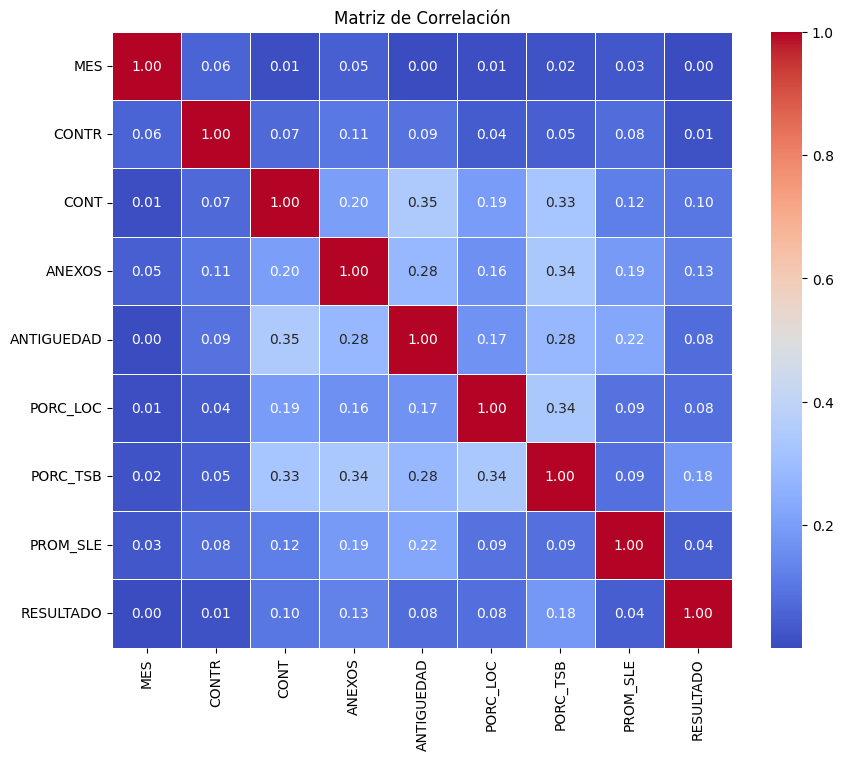

In [22]:
# Calcular la correlación de Spearman
# Se usa Spearman porque los valores de las variables no cumplen con los supuestos de normalidad
#correlation_matrix = bd_cat.corr(method='spearman')
#correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(abs(bd_cat.corr(method='spearman')), annot=True, cmap='coolwarm',cbar=True,fmt= '.2f',linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [35]:
# Elimino TAM

In [284]:
bd_cat2 = pd.DataFrame(bd, columns=['MES','CONTR', 'CONT','ANEXOS', 'ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE','RESULTADO'])

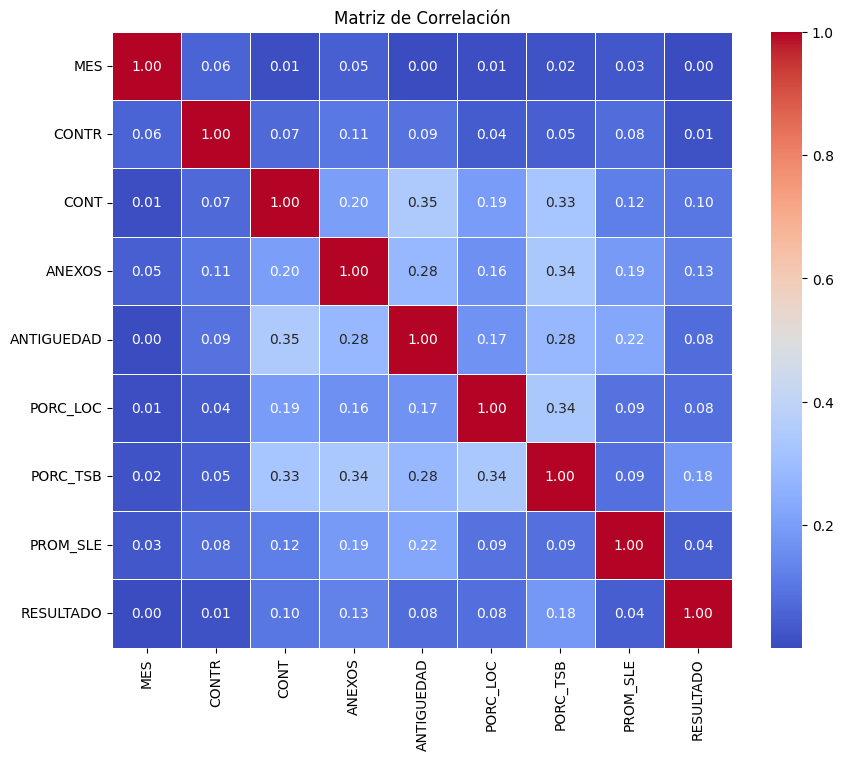

In [285]:
plt.figure(figsize=(10, 8))
sns.heatmap(abs(bd_cat2.corr(method='spearman')), annot=True, cmap='coolwarm',cbar=True,fmt= '.2f',linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [23]:
# Selección de las variables independientes y dependiente
# X = data[['sat1', 'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'medicion', 'N_días_hosp', 'sexo', 'edad']]
X = bd[['MES','CONTR','CONT','ANEXOS', 'ANTIGUEDAD', 'PORC_LOC', 'PORC_TSB','PROM_SLE']]
y = bd['RESULTADO']

In [24]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape

(2660, 8)

In [26]:
# StandardScaler() -> NO ES NECESARIO QUE LAS VARIABLES SE DISTRIBUYAN NORMALMENTE
# Escalar todas las variables de entrada o variables independientes
# Al escalar los valores se convierte a valores entre entre -3 y 3 (media 0 y varianza 1)
# Escalado de características
# El escalado de características es un paso importante en el preprocesamiento de datos antes de entrenar modelos de aprendizaje automático,
# especialmente cuando las características tienen diferentes escalas o varianzas.
# StandardScaler es una de las técnicas comunes para lograr esto, ya que transforma las características de modo que tengan media 0 y varianza 1.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Construcción del Modelo:

* Se define la arquitectura de la red neuronal usando Keras.  * En este ejemplo, se utiliza una red con dos capas ocultas.
* Se compila el modelo con el optimizador Adam y la función de pérdida binary_crossentropy.

In [27]:
# DEFINIR EL MODELO (HIPERPARAMETROS: Cantidad de neuronas, decisión de usar reLU, cantidad de datos para entrenamiento)
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import Dropout

def create_model(reg_param=0.0001):

  model = Sequential()
# La función ReLU se define como
# f(x)=max(0,x).
# En términos simples, para cualquier valor de entrada 𝑥:
# Si x es positivo o cero, la salida es igual a x.
# Si x es negativo, la salida es cero.

# Capa oculta 1, con activación ReLU y regulariación L2 (RIDGE)
  model.add(Dense(32, activation='relu', kernel_regularizer=l2(reg_param), input_shape=(X_train.shape[1],)))
  model.add(BatchNormalization())
  #model.add(Dropout(0.1))

# Capa oculta 2, con activación ReLU y regulariación L2 (RIDGE)
  model.add(Dense(16, activation='relu', kernel_regularizer=l2(reg_param)))
  model.add(BatchNormalization())
  #model.add(Dropout(0.1))

# Capa oculta 3,
 # model.add(Dense(16, activation='relu', kernel_regularizer=l2(reg_param)))
  #model.add(BatchNormalization())
 # model.add(Dropout(0.1))

# Capa de salida
  model.add(Dense(1, activation='sigmoid'))       # Capa de salida con 1 neurona y activación sigmoide adecuada para problemas de clasificación binaria

#  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [28]:
# COMPILAR EL MODELO (MÁS HIPERPARAMETROS)

# Optimizador: Adam es un optimizador popular en redes neuronales que ajusta la tasa de aprendizaje durante el entrenamiento.
# En una próxima ocasión podriamos configurar una tasa de aprendizaje específica optimizer=Adam(learning_rate=0.001).

# Función de pérdida: binary_crossentropy es la función de pérdida adecuada para problemas de clasificación binaria.
# Mide la diferencia entre las distribuciones de probabilidad de la salida esperada y las predicciones del modelo.
# Esta función es apropiada cuando se espera que el modelo genere probabilidades como salida.

# Métricas: 'accuracy' es una métrica común para problemas de clasificación que mide la precisión de las predicciones del modelo.
# Es la fracción de ejemplos de entrada para los cuales el modelo produce la etiqueta correcta.
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 96 (384.00 B)

# Modelo: "sequential"

* Este es el nombre del modelo, indicando que es un modelo secuencial de Keras. Un modelo secuencial en Keras es una pila lineal de capas.

# Capas del Modelo:

1. Capa Dense (Primera Capa)

* Tipo: Dense (densa)
* Forma de la Salida: (None, 64)
"None" indica que el tamaño del batch puede ser cualquier número. "64" indica que esta capa tiene 64 neuronas.
* Parámetros: 896
Los parámetros (o pesos entrenables) de esta capa se calculan como:
Núm. Par.= (Núm. entradas x Núm.Neuronas) + 64 Neuronas = 896.

4. Entrenamiento del Modelo:

* Se entrena el modelo con los datos de entrenamiento, especificando el número de épocas y el tamaño del batch.

In [30]:
# ENTRENAR EL MODELO (AGREGO MÁS HIPERPARAMETROS)
# ACÁ VUELVO A DIVIDIR LOS DATOS DE ENTRENAMIENTO (El 20% se usarán como conjunto de validación)
# MODIFICAR ESTO (Capaz es más util usar un 30%)
# Epochs (épocas): Una época se refiere a una pasada completa de todos los ejemplos de entrenamiento a través del modelo.
# Configurar epochs=50 significa que el modelo se entrenará durante 50 épocas completas, es decir, pasará 50 veces por todo el conjunto de entrenamiento.

# Batch Size (tamaño del lote): El tamaño del lote (batch_size=32 en tu caso) especifica cuántos ejemplos de entrenamiento se utilizan antes de que los
# pesos del modelo se actualicen. Un tamaño de lote más pequeño puede llevar a una convergencia más lenta pero puede mejorar la generalización,
# mientras que un tamaño de lote más grande puede acelerar el entrenamiento pero puede resultar en una generalización deficiente.

# Validation Split (división de validación): validation_split=0.2 indica que el 20% de los datos de entrenamiento se utilizarán como conjunto de validación.
# Durante el entrenamiento, el modelo evaluará su rendimiento en este conjunto de validación después de cada época. Esta evaluación ayuda a monitorear si el modelo
# está sobreajustando los datos de entrenamiento y cómo se generalizará a nuevos datos.

# Verbose (verbosidad): verbose=1 indica que se mostrará información detallada durante el entrenamiento, como el progreso de cada época y las métricas de entrenamiento y validación.

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4968 - loss: 0.9397 - val_accuracy: 0.5301 - val_loss: 0.6935
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4986 - loss: 0.7638 - val_accuracy: 0.4718 - val_loss: 0.7066
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5440 - loss: 0.7072 - val_accuracy: 0.4605 - val_loss: 0.7313
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5462 - loss: 0.6959 - val_accuracy: 0.4605 - val_loss: 0.7658
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5787 - loss: 0.6764 - val_accuracy: 0.4605 - val_loss: 0.7887
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5756 - loss: 0.6756 - val_accuracy: 0.4605 - val_loss: 0.8076
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6138 - loss: 0.6622 - val_accuracy: 0.4605 - val_loss: 0.8111
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5906 - loss: 0.6634 - val_accuracy: 0.4586 - 

In [ ]:
# SE MUESTRAN A CONTINUACIÓN LOS RESULTADOS DE LA ÚLTIMA ITERACIÓN (50) SERÁ DISTINTO PORQUE HE VUELTO A CORRER EL MODELO

# Análisis y Problemas de nuestro Modelo de Red Neuronal
1. loss: 0.5682:

* La función de pérdida en el conjunto de entrenamiento al final de la última época es de 0.5682.
* Una menor pérdida generalmente indica un mejor ajuste del modelo a los datos de entrenamiento.

2. accuracy: 0.7465:

* La precisión en el conjunto de entrenamiento es del 74.65%.
* Esto sugiere que el modelo está clasificando correctamente el 74.65% de las muestras del conjunto de entrenamiento.

3. val_loss: 0.5678:

* La función de pérdida en el conjunto de validación es de 0.5678.
* Es común que la pérdida en el conjunto de validación sea un poco más alta que en el conjunto de entrenamiento, pero aún así, el valor es razonablemente bajo.

4. val_accuracy: 0.8209:

* La precisión en el conjunto de validación es del 82.09%.
* Esto indica que el modelo está clasificando correctamente el 82.09% de las muestras del conjunto de validación.

5. Evaluación del Modelo:

* Se evalúa el modelo utilizando los datos de prueba.
* Se grafican las curvas de pérdida y precisión del entrenamiento para visualizar el rendimiento del modelo.

In [31]:
# EVALUAR EL MODELO EN EL CONJUNTO DE PRUEBA
# Test Loss (Pérdida en el conjunto de prueba): Es una medida de qué tan incorrectas fueron las predicciones del modelo en promedio para el conjunto de datos de prueba.
# Cuanto menor sea la pérdida, mejor será el rendimiento del modelo.

# Test Accuracy (Precisión en el conjunto de prueba): Es la proporción de muestras correctamente clasificadas en el conjunto de prueba. En este caso,
# significa que el 70.3% de las predicciones del modelo en el conjunto de prueba son correctas.

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 0.6821
Test Loss: 0.6708623766899109
Test Accuracy: 0.6219298243522644


# **Análisis de Resultados**
1. Buena Precisión en el Conjunto de Prueba:

* Una precisión del 71.01% en el conjunto de prueba sugiere que el modelo tiene un rendimiento razonablemente bueno en datos no vistos.
* Esta precisión es coherente con la precisión del 70.00% obtenida en el conjunto de validación durante el entrenamiento, lo que indica que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.

2. Pérdida y Precisión:

* La pérdida de 0.6069 en el conjunto de prueba es aceptable, aunque siempre hay margen para la mejora.
* La precisión en el conjunto de prueba es ligeramente superior a la precisión de validación, lo cual es una buena señal.

In [32]:
# Graficar la pérdida y la precisión del modelo durante el entrenamiento
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

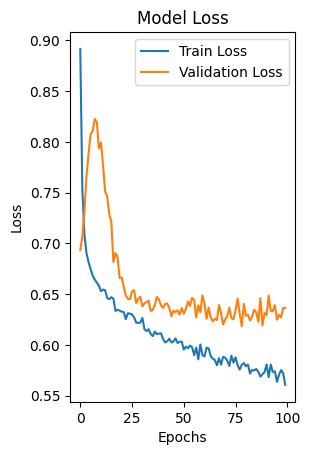

In [33]:
# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0.5, 0.8)
plt.legend()

In [ ]:
# CONSIDERACIONES PARA EL TRABAJO FINAL
# Probar con ambos hospitales (capaz uno esta mejor que otro), con rangos de edad (capaz los adultos requieren más atencion), con algunas mediciones, agrupar con N_dias_hosp.
# Libro de codigos (notebook) y resumen word o ppt (3 o 4 páginas) explicando cada uno de los resultados

# Análisis del gráfico
1. Curva de Pérdida de Entrenamiento (Train Loss):

* La curva azul representa la pérdida en el conjunto de entrenamiento.
* Observamos que la pérdida de entrenamiento disminuye constantemente a medida que aumentan las épocas.
* Esto es un signo de que el modelo está aprendiendo y ajustándose cada vez mejor a los datos de entrenamiento.

2. Curva de Pérdida de Validación (Validation Loss):

* La curva naranja representa la pérdida en el conjunto de validación.
* Inicialmente, la pérdida de validación disminuye junto con la pérdida de entrenamiento, lo cual es esperable y deseable.
* Sin embargo, después de un cierto punto (alrededor de la época 10), la pérdida de validación comienza a aumentar nuevamente mientras la pérdida de entrenamiento sigue disminuyendo.

# **ANÁLISIS FINAL**
**Existe Sobreajuste (Overfitting)**
* El hecho de que la pérdida de validación comience a aumentar mientras que la pérdida de entrenamiento sigue disminuyendo es un claro signo de sobreajuste.
* El modelo está aprendiendo demasiado bien los detalles y ruidos específicos del conjunto de entrenamiento, lo cual perjudica su capacidad de generalizar a nuevos datos no vistos (conjunto de validación).

# **MÉTODOS SUPERVISADOS**

1. Ajuste de Hiperparámetros

* Experimentar con diferentes tasas de aprendizaje, número de épocas y tamaños de lote.
* Probar arquitecturas de red más profundas o con más neuronas en cada capa.

2. Regularización:

* Añadir técnicas de regularización
Dropout puede ser una opción para prevenir el sobreajuste.
* Usar Regularización L2 (Ridge) o Elastic Net  (L1+L2) en las capas densas.

3. Evaluar las proporciones de datos de entrenamiento y test. * Cuestionar (opine con argumentos estadísticos) si la muestra es suficiente, cosndoerando que es una medición mensual.

4. Balanceo de Datos:

* Asegurarse de que la variable dependiente esté equilibrada. Si no lo está, técnicas como el sobremuestreo o el submuestreo pueden ayudar.

5. Early Stopping
* Early Stopping es una técnica que detiene el entrenamiento cuando la pérdida de validación deja de mejorar por un número específico de épocas. Esto puede prevenir el sobreajuste al detener el entrenamiento antes de que el modelo comience a memorizar el ruido del conjunto de entrenamiento.

# **PREDICCIÓN**

In [34]:
# Cargar el archivo desde el PC
uploaded = files.upload()

Saving PREDECIR.xlsx to PREDECIR.xlsx


In [36]:
# Leer el archivo de Excel
file_name = list(uploaded.keys())[0]
pred = pd.read_excel(file_name)

In [38]:
pred.shape

(194, 16)

In [37]:
pred.head(10)

,RUC,key,SECTOR,ZONAL,TAMAÑO,VENTAS,CONTRICAT,CONTAB,ANEXOS,FINICIO,ANTIGUEDAD,PORC_LOC,PORC_OBR,PORC_TSB,PROM_SLO,PROM_SLE
0,20142920558,RUC-8526,INDUSTRIAS MANUFACTURERAS,Balnearios,PEQUEÑA EMPRESA,DE 150 A 200 UIT,Empresas y Entidades Comerciales,COMPUTARIZADO,1.0,1993-06-10,31.241615,0.38,NaN,NaN,NaN,NaN
1,20117925375,RUC-5789,OTROS,Oeste,MICROEMPRESA,DE 1 A 25 UIT,Instituciones Educativas y Culturales,MANUAL/COMPUTARIZADO,34.0,1978-10-17,45.889117,0.39,NaN,0.00,NaN,2607.34
2,20554121030,RUC-124952,COMERCIO AL POR MAYOR Y MENOR,Este,PEQUEÑA EMPRESA,DE 900 A 1000 UIT,Empresas y Entidades Comerciales,COMPUTARIZADO,1.0,2013-08-19,11.049966,0.04,NaN,0.42,NaN,371.82
3,20100095450,RUC-811,INDUSTRIAS MANUFACTURERAS,Este,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,8.0,1910-10-20,113.880903,0.02,0.24,0.01,1042.22,2348.93
4,20431386004,NaN,NaN,Sur,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,20503876150,RUC-42140,COMERCIO AL POR MAYOR Y MENOR,Sur,GRAN EMPRESA,DE 10000 UIT A MAS,Empresas y Entidades Comerciales,COMPUTARIZADO,1.0,2002-02-26,22.527036,0.07,NaN,0.00,NaN,2259.01
6,20507771204,RUC-47339,"SERVICIOS (INMOBILIARIAS, EMPRESARIALES Y ALQU...",Centro,GRAN EMPRESA,DE 3500 A 4000 UIT,Empresas y Entidades Comerciales,COMPUTARIZADO,1.0,2003-12-04,20.758385,0.01,NaN,0.02,NaN,1472.47
7,20538295541,RUC-91846,"SERVICIOS (INMOBILIARIAS, EMPRESARIALES Y ALQU...",Oeste,GRAN EMPRESA,DE 5000 A 10000 UIT,Empresas y Entidades Comerciales,MANUAL/COMPUTARIZADO,1.0,2011-06-20,13.215606,0.01,NaN,0.02,NaN,814.00
8,20556502928,NaN,NaN,Este,GRAN EMPRESA,DE 3000 A 3500 UIT,NaN,NaN,NaN,NaT,NaN,0.01,NaN,0.03,NaN,1646.05
9,20548016968,NaN,NaN,Este,PEQUEÑA EMPRESA,DE 400 A 500 UIT,NaN,NaN,NaN,NaT,NaN,0.16,0.13,0.05,1211.04,1109.01


In [39]:
# Eliminar registros en los cuales el 'Key' es NaN
pred = pred.dropna(subset=['key'])

In [40]:
pred.shape

(161, 16)

In [41]:
# Agrego el mes presente
pred['MES'] = 9

In [42]:
# TRANSFORMAR CATEGORICAS A NUMERICAS

# VENT -> VENTAS
ventas_mapping = {'DE 1 A 25 UIT': 1,    'DE 25 A 50 UIT': 2,    'DE 50 A 75 UIT': 3,    'DE 75 A 100 UIT': 4,    'DE 100 A 125 UIT': 5,    'DE 125 A 150 UIT': 6,    'DE 150 A 200 UIT': 7,    'DE 200 A 300 UIT': 8,
    'DE 300 A 400 UIT': 9,    'DE 400 A 500 UIT': 10,    'DE 500 A 600 UIT': 11,    'DE 600 A 700 UIT': 12,    'DE 700 A 800 UIT': 13,    'DE 800 A 900 UIT': 14,    'DE 900 A 1000 UIT': 15,    'DE 1000 A 1100 UIT': 16,
    'DE 1100 A 1200 UIT': 17,    'DE 1200 A 1300 UIT': 18,    'DE 1300 A 1400 UIT': 19,    'DE 1400 A 1500 UIT': 20,    'DE 1500 A 1600 UIT': 21,    'DE 1600 A 1700 UIT': 22,    'DE 1700 A 1800 UIT': 23,    'DE 1800 A 1900 UIT': 24,
    'DE 1900 A 2000 UIT': 25,    'DE 2000 A 2100 UIT': 26,    'DE 2100 A 2200 UIT': 27,    'DE 2200 A 2300 UIT': 28,    'DE 2300 A 2500 UIT': 29,    'DE 2500 A 3000 UIT': 30,    'DE 3000 A 3500 UIT': 31,    'DE 3500 A 4000 UIT': 32,
    'DE 4000 A 5000 UIT': 33,    'DE 5000 A 10000 UIT': 34,    'DE 10000 UIT A MAS': 35}
pred['VENT'] = pred['VENTAS'].map(ventas_mapping)

# CONTRI -> CONTRICAT
contricat_mapping = { 'Empresas y Entidades Comerciales': 5,    'Entidades Gubernamentales y Públicas': 4,    'Instituciones Educativas y Culturales': 3,    'Organizaciones Sociales y Comunitarias': 2,    'Otros': 1}
pred['CONTR'] = pred['CONTRICAT'].map(contricat_mapping)

# CONT <- CONTAB
contab_mapping = {    'MANUAL': 1,    'MANUAL/COMPUTARIZADO': 2,    'COMPUTARIZADO': 3}
pred['CONT'] = pred['CONTAB'].map(contab_mapping)


In [43]:
# Separo mi columna de RUCs
pred_rucs = pred[['RUC']]

In [44]:
# Ordenar columnas y eliminar variables
pred = pred[['MES', 'CONTR','CONT','ANEXOS','ANTIGUEDAD', 'PORC_LOC','PORC_TSB','PROM_SLE']]

In [46]:
# resetear los indices
pred = pred.reset_index(drop=True)

In [ ]:
pred.head(50)

In [48]:
# IMPUTACIÓN DE LA SABANA
from sklearn.impute import KNNImputer

# Instanciar el imputador KNN con k=5 (puedes ajustar k según tu conjunto de datos)
imputer = KNNImputer(n_neighbors=5)

# Imputar valores faltantes en las variables seleccionadas 'X'
pred_imputed = imputer.fit_transform(pred)

# Convertir el resultado de vuelta a un DataFrame
pred_imputed = pd.DataFrame(pred_imputed, columns=pred.columns)

In [50]:
pred_imputed.head(20)

,MES,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE
0,9.0,5.0,3.0,1.0,31.241615,0.38,0.044,2265.68
1,9.0,3.0,2.0,34.0,45.889117,0.39,0.000,2607.34
2,9.0,5.0,3.0,1.0,11.049966,0.04,0.420,371.82
3,9.0,5.0,3.0,8.0,113.880903,0.02,0.010,2348.93
4,9.0,5.0,3.0,1.0,22.527036,0.07,0.000,2259.01
5,9.0,5.0,3.0,1.0,20.758385,0.01,0.020,1472.47
6,9.0,5.0,2.0,1.0,13.215606,0.01,0.020,814.00
7,9.0,5.0,3.0,62.0,30.119097,0.01,0.000,2622.73
8,9.0,5.0,3.0,3.0,22.431211,0.15,0.212,2549.71
9,9.0,5.0,3.0,26.0,8.090349,0.42,0.010,2372.10


In [51]:
# Normalizar los datos usando el mismo StandardScaler
X_imputed = pred_imputed
X_imputed_scaled = scaler.transform(X_imputed)

In [52]:
# Realizar predicciones
probabilities = model.predict(X_imputed_scaled)
predictions = (probabilities > 0.65).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [53]:
# Agregar las predicciones y probabilidades al DataFrame
pred_imputed['Probabilidad'] = probabilities
pred_imputed['Prediccion'] = predictions

In [54]:
pred_imputed.shape

(161, 10)

In [55]:
pred_imputed.head(10)

,MES,CONTR,CONT,ANEXOS,ANTIGUEDAD,PORC_LOC,PORC_TSB,PROM_SLE,Probabilidad,Prediccion
0,9.0,5.0,3.0,1.0,31.241615,0.38,0.044,2265.68,0.432307,0
1,9.0,3.0,2.0,34.0,45.889117,0.39,0.000,2607.34,0.056864,0
2,9.0,5.0,3.0,1.0,11.049966,0.04,0.420,371.82,0.871318,1
3,9.0,5.0,3.0,8.0,113.880903,0.02,0.010,2348.93,0.006828,0
4,9.0,5.0,3.0,1.0,22.527036,0.07,0.000,2259.01,0.619946,0
5,9.0,5.0,3.0,1.0,20.758385,0.01,0.020,1472.47,0.744768,1
6,9.0,5.0,2.0,1.0,13.215606,0.01,0.020,814.00,0.370199,0
7,9.0,5.0,3.0,62.0,30.119097,0.01,0.000,2622.73,0.381999,0
8,9.0,5.0,3.0,3.0,22.431211,0.15,0.212,2549.71,0.683303,1
9,9.0,5.0,3.0,26.0,8.090349,0.42,0.010,2372.10,0.470965,0


In [56]:
pred_rucs.shape

(161, 1)

In [57]:
pred_rucs.head(10)

,RUC
0,20142920558
1,20117925375
2,20554121030
3,20100095450
5,20503876150
6,20507771204
7,20538295541
10,20253881438
12,20504073069
13,20601403511


In [58]:
# Concatenar los DataFrames por columnas
resultado = pd.concat([pred_rucs, pred_imputed], axis=1)

In [59]:
resultado.shape

(186, 11)

In [61]:
# Descargar
import pandas as pd

resultado.to_excel('prediccion_MGC.20240906.xlsx', index=False)

from google.colab import files

# Descarga el archivo
files.download('prediccion_MGC.20240906.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>